In [1]:
import sys
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt



path='/home/jbohne/sbu/'
sys.path.append(f'{path}taq_db/TAQ-Query-Scripts/data')
sys.path.append(f'{path}research/Adaptive_Signal_Estimation_Private')

from trend_filtering.adaptive_tf import adaptive_tf
from trend_filtering.test_adaptive_tf import test_adaptive_tf
from profiling.profiler import profile

In [2]:
trades=pd.read_csv(f'{path}taq_db/TAQ-Query-Scripts/data/AAPL_trades.csv',index_col=0).dropna()

price=trades['Trade_Price'].values

### Overview of Estimation

solved
pobj1: 6713226.6070587775, pobj2: 1.025588783582571, dobj: 1.0255879704727884, gap: 8.131097826158395e-07
solved
pobj1: 540.2268825234457, pobj2: 25.801914881168234, dobj: 25.80191392945619, gap: 9.517120425073244e-07
solved
pobj1: 371.8392637575362, pobj2: 36.291055940937085, dobj: 36.29105528240609, gap: 6.585309932916061e-07
solved
pobj1: 294.7611267797092, pobj2: 44.26484667301663, dobj: 44.26484621206183, gap: 4.609547943346115e-07
solved
pobj1: 233.8962975354359, pobj2: 50.988068585533824, dobj: 50.988068298232534, gap: 2.873012903137351e-07
No solution found for lambda = 1267.9201073491768
Status: maxiter exceeded
No solution found for lambda = 1521.484128819012
Status: maxiter exceeded
No solution found for lambda = 1775.0481502888474
Status: maxiter exceeded
No solution found for lambda = 2028.6121717586827
Status: maxiter exceeded
No solution found for lambda = 2282.176193228518
Status: maxiter exceeded
pobj1: 2024787.8881757695, pobj2: 51945.17515788243, dobj: 0.0, ga

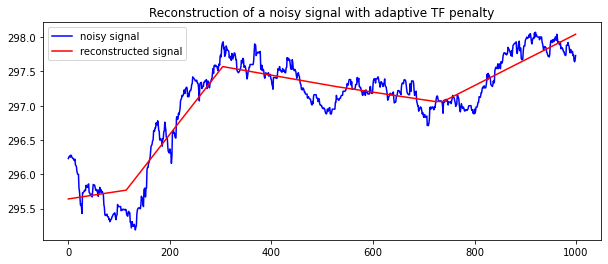

In [3]:
test_adaptive_tf(price,1000,include_cv=True,lambda_p=1.0,plot=True,verbose=True)



### Performance of Sherman-Morrison -Woodbury Formula vs Naive Matrix Inversion (With Numba)


Naive Matrix Inversion

In [4]:
profile(test_adaptive_tf)(price,1000,include_cv=False,lambda_p=1.0,plot=False,verbose=False)

Profiling: test_adaptive_tf

*** PROFILER RESULTS ***
inner (/home/jbohne/sbu/research/Adaptive_Signal_Estimation_Private/profiling/profiler.py:10)
function called 1 times

         1954 function calls (1951 primitive calls) in 2.783 seconds

   Ordered by: cumulative time, internal time, call count
   List reduced from 160 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.783    2.783 profiler.py:10(inner)
        1    0.000    0.000    2.782    2.782 test_adaptive_tf.py:10(test_adaptive_tf)
        1    0.006    0.006    2.741    2.741 adaptive_tf.py:9(adaptive_tf)
       51    2.658    0.052    2.661    0.052 adaptive_tf.py:110(update_step)
       51    0.047    0.001    0.048    0.001 adaptive_tf.py:88(prep_matrices)
        1    0.000    0.000    0.041    0.041 difference_matrix.py:9(__init__)
       51    0.024    0.000    0.024    0.000 adaptive_tf.py:97(compute_objective)
        1    0.000   

Sherman-Morrison -Woodbury Formula

In [ ]:
profile(test_adaptive_tf)(price,1000,include_cv=False,lambda_p=1.0,plot=False,verbose=False)

### Effect of Numba Compilation

- Systems of 500,1000 have much better performance (20-40%)